# Regressão Linear: Reobtendo a Lei de Moore Usando o Tensorflow

In [2]:
# Importando o tensorflow
import tensorflow as tf


2022-04-16 12:39:35.666914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-16 12:39:35.666948: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Importando as demais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

In [4]:
# Obtendo a base de dados
# !wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [5]:
# Carregando a base de dados e trabalhando com ela
data = pd.read_csv("moore.csv", header=None).values
x = data[:, 0].reshape(-1,1)
y = data[:, 1]

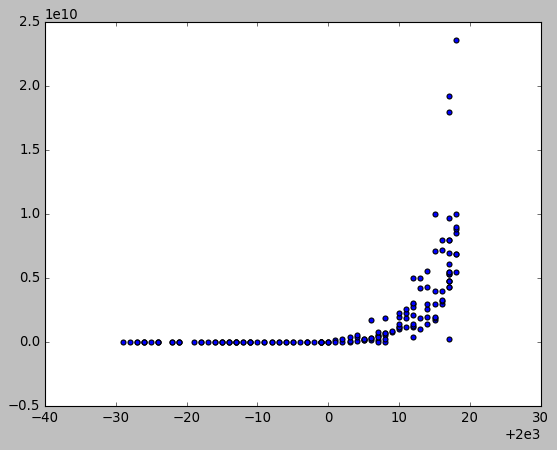

In [6]:
plt.scatter(x,y)
plt.show()

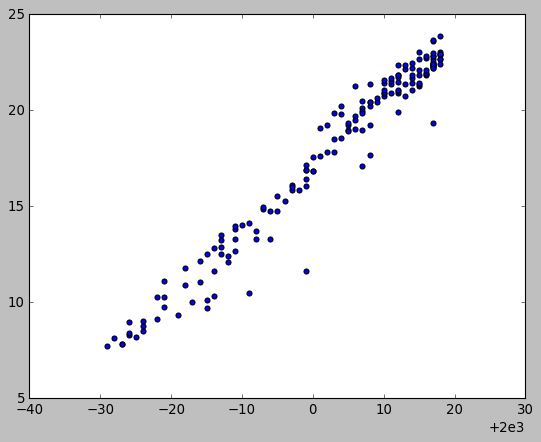

In [7]:
# Sabendo que queremos um modelo linear, vamos tomar o logaritmo
y = np.log(y)
plt.scatter(x, y)
plt.show()

Vamos realizar um breve pré-processamento dos dados antes de construirmos o modelo, primeiramente vamos centralizar os dados em x.

In [8]:
x = x - x.mean()

In [9]:
# Agora podemos criar o nosso modelo no tensorflow

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')


# Criando uma agenda para o treinamento
def schedule(epoch, lr):
    if epoch >=50:
        return 0.0001
    return 0.001


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Treinando o modelo
r = model.fit(x, y, epochs=200, callbacks=[scheduler])

Epoch 1/200


2022-04-16 12:39:39.145913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-16 12:39:39.145945: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-16 12:39:39.145967: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lucas-Inspiron-5566): /proc/driver/nvidia/version does not exist
2022-04-16 12:39:39.146300: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 0s 2ms/step - loss: 367.3053 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 395.2309 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 309.3835 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 273.1751 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 237.9915 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 148.6836 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 97.7348 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 92.7638 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 59.7228 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 35.0790 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 26.7713 - lr:

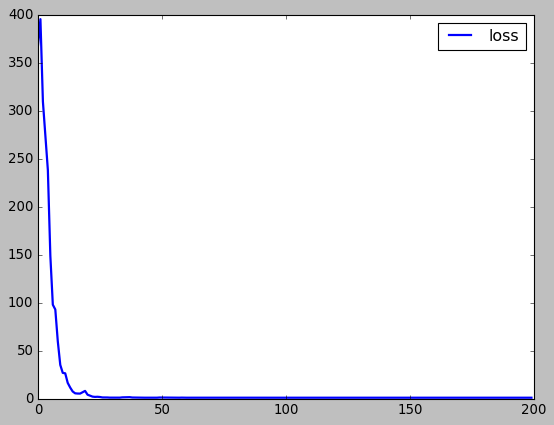

In [10]:
# plotando a função loss
plt.plot(r.history['loss'], label='loss', linewidth=2)
plt.legend(loc='best')
plt.show()

In [11]:
# Obtendo a inclinação da reta
# A inclinação da reta é a taxa de crescimento do número de transistors

print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33886534]], dtype=float32), array([17.761274], dtype=float32)]


In [12]:
# A inclinação da reta é:
a = model.layers[0].get_weights()[0][0,0]

Portanto, o tempo para dobrar o número de transistores pode ser dado por:

In [13]:
x = np.array(x).flatten()
y = np.array(y)
denominador = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean() * x.sum())/denominador
b = (y.mean() * x.dot(x) - x.mean() * x.dot(y))/denominador
print(a, b)
print('Tempo para dobrar o número de transistores: ', np.log(2)/a)

0.34168248738731316 17.764939393631764
Tempo para dobrar o número de transistores:  2.0286295205239195


## Parte 2: Realizando previsões

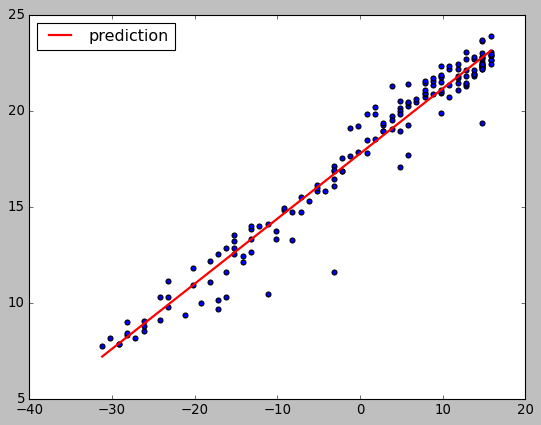

In [14]:
# Verificand ose a linha se ajusta aos dados
yhat = model.predict(x).flatten()
plt.scatter(x, y)
plt.plot(x, yhat, 'r-', label='prediction', linewidth=2)
plt.legend(loc='best')
plt.show()

In [15]:
# Calculo manual

    # Obtendo os pesos
w, b = model.layers[0].get_weights()

# Usando o reshape para retomar o formato original
x = x.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
yhat2 = (x.dot(w) + b).flatten()


# Não podemos utilizar '==' para pontos fluantes
np.allclose(yhat, yhat2)


True

## Parte 3: Salvando e Carregando um Modelo

In [16]:
model.save('moore_law.h5')

Agora vamos carregar o modelo e confirmar que ele ainda funciona.

In [18]:
model = tf.keras.models.load_model('moore_law.h5')
print(model.layers)

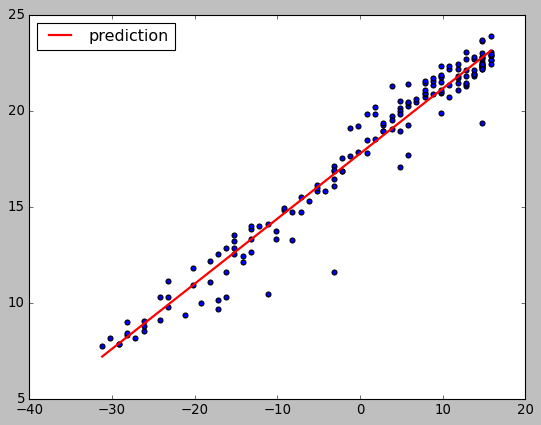

In [19]:
print()

# Verificand ose a linha se ajusta aos dados
yhat = model.predict(x).flatten()
plt.scatter(x, y)
plt.plot(x, yhat, 'r-', label='prediction', linewidth=2)
plt.legend(loc='best')
plt.show()